In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

<h2 style="font-size:16px">
Data Prerocessing Main Data

In [2]:
df_sheet1 = pd.read_excel('data.xlsx', sheet_name='AU')
df_sheet2 = pd.read_excel('data.xlsx', sheet_name='NZ')

In [3]:
df_sheet1["Country"]="AU"
df_sheet2["Country"]="NZ"

In [4]:
df_base = pd.concat([df_sheet1, df_sheet2], ignore_index=True)

In [5]:
df = df_base.copy()

In [6]:
df.head()

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,1527274036,0,0,2,0,0,en,AU
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,1527279912,0,0,0,0,0,en,AU
2,1000141281241149952,Talking all things UAV and where the future is...,1527280037,6,0,8,0,0,en,AU
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",1527282684,0,0,2,0,0,en,AU
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,1527284047,2,0,12,0,0,en,AU


In [7]:
len(df)

56245

In [8]:
df.head(300)

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,1527274036,0,0,2,0,0,en,AU
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,1527279912,0,0,0,0,0,en,AU
2,1000141281241149952,Talking all things UAV and where the future is...,1527280037,6,0,8,0,0,en,AU
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",1527282684,0,0,2,0,0,en,AU
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,1527284047,2,0,12,0,0,en,AU
...,...,...,...,...,...,...,...,...,...,...
295,1004155594704489984,VIDEO: After lunch at @EnergyNetwork18 confere...,1528237124,0,0,2,0,0,en,AU
296,1004166445402480000,Help learners develop thinking skills and self...,1528239711,0,0,0,0,0,en,AU
297,1004166788601400064,Adaptive engine as part of AI. I need to know ...,1528239793,0,0,0,0,0,en,AU
298,1004169035846520064,Triggering curiosity. What happens when AI int...,1528240329,0,0,0,0,0,en,AU


In [9]:
len(df)

56245

In [10]:
# Unix zaman damgalarını dönüştürmek için bir döngü kullanın
for index, row in df.iterrows():
    unix_timestamp = row['tcreatedat']
    converted_timestamp = datetime.datetime.utcfromtimestamp(unix_timestamp)
    formatted_timestamp = converted_timestamp.strftime('%Y-%m-%d %H:%M:%S')
    
    # Dönüştürülen tarih değerini güncelleyin
    df.at[index, 'tcreatedat'] = formatted_timestamp


In [11]:
df.head()

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,2018-05-25 18:47:16,0,0,2,0,0,en,AU
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,2018-05-25 20:25:12,0,0,0,0,0,en,AU
2,1000141281241149952,Talking all things UAV and where the future is...,2018-05-25 20:27:17,6,0,8,0,0,en,AU
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",2018-05-25 21:11:24,0,0,2,0,0,en,AU
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,2018-05-25 21:34:07,2,0,12,0,0,en,AU


In [12]:
def preprocessing(tweet):
    if isinstance(tweet, str):  # Check if the input is a string
        if tweet:
            
            # Exclude URLs
            tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)

            # Özel karakterleri ve bağlantıları kaldırma
            tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)

            # Duraklama kelimelerini kaldırma
            stop_words = set(stopwords.words('english'))
            tokens = nltk.word_tokenize(tweet)
            tweet = ' '.join([token for token in tokens if token.lower() not in stop_words])

            # Noktalama işaretlerini kaldırma
            tweet = re.sub(r'[^\w\s]', '', tweet)

            # Küçük harfe dönüştürme
            tweet = tweet.lower()

            # Emojileri kaldırma
            tweet = tweet.encode('ascii', 'ignore').decode('utf-8')

            # Hashtagleri ayırma
            tweet = re.sub(r'#(\w+)', r'\1', tweet)

            # Tokenizing
            tokens = word_tokenize(tweet)

            # Stemming
            stemmer = PorterStemmer()
            tokens = [stemmer.stem(token) for token in tokens]

            # Lemmatizing
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(token) for token in tokens]

            # Joining Text
            processed_text = " ".join(tokens)

            return processed_text
        else:
            return ""
    else:
        return ""

In [13]:
print(preprocessing("i have has alarm clock on #AI ### smile :) day!!!"))

alarm clock ai smile day


In [14]:
df['processedtext'] = df['ttext'].apply(preprocessing)

In [15]:
df.head()

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country,processedtext
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,2018-05-25 18:47:16,0,0,2,0,0,en,AU,innovato group data analyst augment machin lea...
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,2018-05-25 20:25:12,0,0,0,0,0,en,AU,wait bitcoin ride btc crypto cryptocurr btc et...
2,1000141281241149952,Talking all things UAV and where the future is...,2018-05-25 20:27:17,6,0,8,0,0,en,AU,talk thing uav futur head dynam industri women...
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",2018-05-25 21:11:24,0,0,2,0,0,en,AU,disrupt camera manufactur make vr headset tini...
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,2018-05-25 21:34:07,2,0,12,0,0,en,AU,excit day two amanatcon polici debat includ ec...


<h2 style="font-size:16px">
Data Preprocessing for Transfer Learning Dataset

In [16]:
transfer_data_base = pd.read_csv("supervised.csv")

In [17]:
transfer_data = transfer_data_base.copy()

In [18]:
transfer_data.head(3120)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
3115,cdaf41cec4,@_catchfire Happy Birthday Chip`s sister,Happy Birthday Chip`s sister,positive
3116,ffc2d1db72,whew finally got in to RC..,whew finally got in to RC..,positive
3117,e4e206506b,"****, my photo is gone!","****, my photo is gone!",neutral
3118,2a92889496,this is sounding like the worst lurgy ever - ...,this is sounding like the worst lurgy ever - t...,negative


In [19]:
transfer_data = transfer_data.dropna()

In [20]:
transfer_data.head(2225)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
2221,c8e44ba4ed,"Sitting watching britain`s got f all talent, b...",watched a small girl cry and it`s sad,negative
2222,ffce24e081,Oh No! Oprah jumped in front again,Oh No!,negative
2223,755e26b1b0,Sleeping in for me is sleeping until 8am But...,Sleeping in for me is sleeping until 8am But ...,neutral
2224,22e55199bd,It`s cause you give me a reason to assume. - ...,It`s cause you give me a reason to assume.,neutral


In [21]:
transfer_data['processedtext'] = transfer_data['selected_text'].apply(preprocessing)

In [22]:
transfer_data.to_csv("transfer_data.csv", index=True)

In [23]:
data = transfer_data[["processedtext","sentiment"]]

In [24]:
X= data["processedtext"]
y= data["sentiment"]

In [25]:
data.head()

,processedtext,sentiment
0,id respond go,neutral
1,sooo sad,negative
2,bulli,negative
3,leav alon,negative
4,son,negative


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf =TfidfVectorizer(stop_words="english")

In [30]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [31]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nb = MultinomialNB()

In [34]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression(max_iter=1000)

In [37]:
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [38]:
from sklearn.svm import SVC,LinearSVC

In [39]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf,y_train)

SVC()

In [40]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train_tfidf,y_train)

GradientBoostingClassifier()

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [43]:
from sklearn.ensemble import VotingClassifier

# Örnek modeller
model1 = MultinomialNB()
model2 = LogisticRegression(max_iter=1000)
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()
model5 = LinearSVC()

# Voting Classifier oluşturma
voting_classifier = VotingClassifier(estimators=[('mb',model1),('lr', model2), ('rf', model3),('gbc',model4),('svc',model5)])

# Modelleri eğitim verileriyle uygulama
voting_classifier.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('mb', MultinomialNB()),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('svc', LinearSVC())])

In [44]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [45]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

    negative       0.88      0.60      0.72      2602
     neutral       0.70      0.91      0.79      3667
    positive       0.87      0.78      0.83      2800

    accuracy                           0.78      9069
   macro avg       0.82      0.77      0.78      9069
weighted avg       0.81      0.78      0.78      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


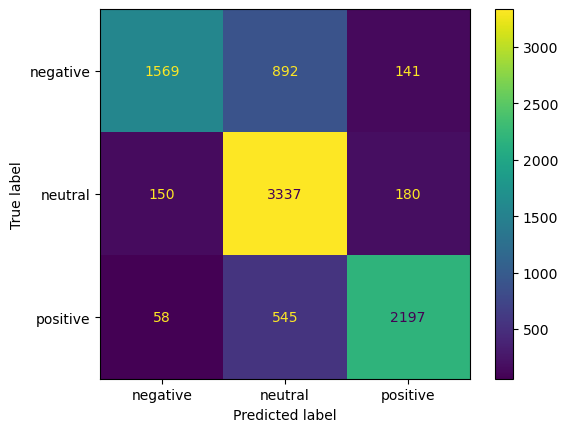

In [46]:
report(nb)

              precision    recall  f1-score   support

    negative       0.84      0.66      0.74      2602
     neutral       0.73      0.87      0.79      3667
    positive       0.87      0.80      0.83      2800

    accuracy                           0.79      9069
   macro avg       0.81      0.78      0.79      9069
weighted avg       0.80      0.79      0.79      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


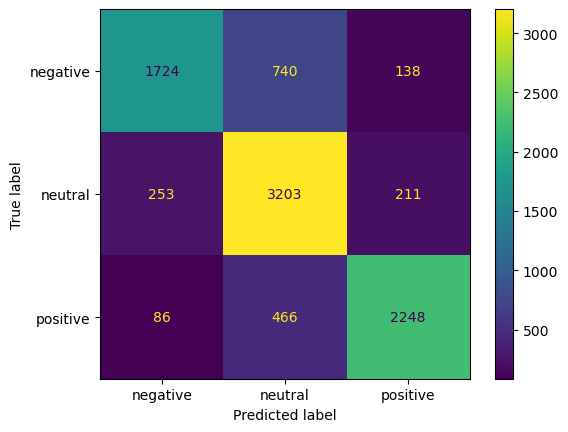

In [47]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.81      0.72      0.76      2602
     neutral       0.76      0.88      0.82      3667
    positive       0.89      0.79      0.84      2800

    accuracy                           0.81      9069
   macro avg       0.82      0.80      0.81      9069
weighted avg       0.81      0.81      0.81      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


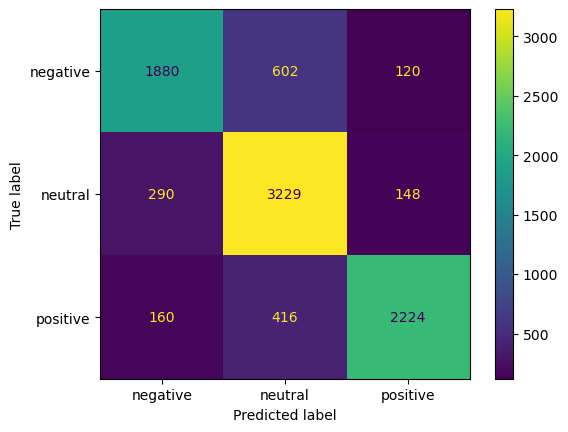

In [48]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.75      0.75      0.75      2602
     neutral       0.78      0.80      0.79      3667
    positive       0.83      0.81      0.82      2800

    accuracy                           0.79      9069
   macro avg       0.79      0.79      0.79      9069
weighted avg       0.79      0.79      0.79      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


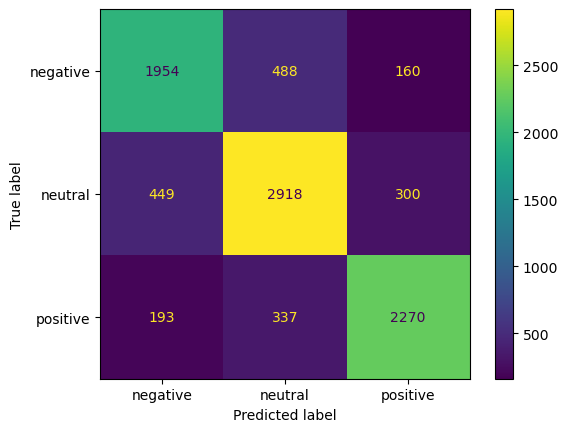

In [49]:
report(linear_svc)

              precision    recall  f1-score   support

    negative       0.89      0.42      0.57      2602
     neutral       0.59      0.93      0.72      3667
    positive       0.88      0.64      0.74      2800

    accuracy                           0.70      9069
   macro avg       0.79      0.67      0.68      9069
weighted avg       0.77      0.70      0.69      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


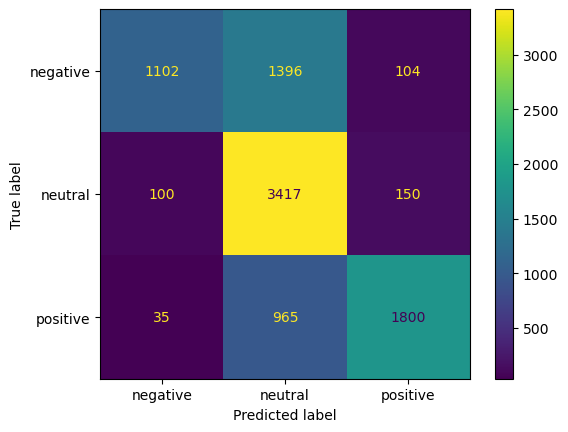

In [50]:
report(gbc)

              precision    recall  f1-score   support

    negative       0.73      0.76      0.75      2602
     neutral       0.79      0.81      0.80      3667
    positive       0.86      0.80      0.83      2800

    accuracy                           0.79      9069
   macro avg       0.79      0.79      0.79      9069
weighted avg       0.79      0.79      0.79      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


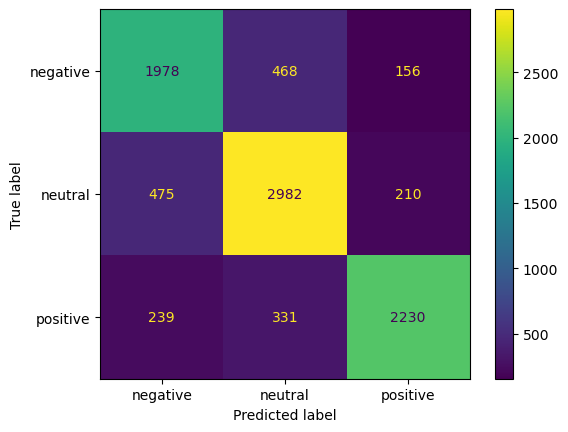

In [51]:
report(rf_classifier)

              precision    recall  f1-score   support

    negative       0.86      0.65      0.74      2602
     neutral       0.72      0.90      0.80      3667
    positive       0.88      0.80      0.84      2800

    accuracy                           0.80      9069
   macro avg       0.82      0.78      0.79      9069
weighted avg       0.81      0.80      0.79      9069



C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


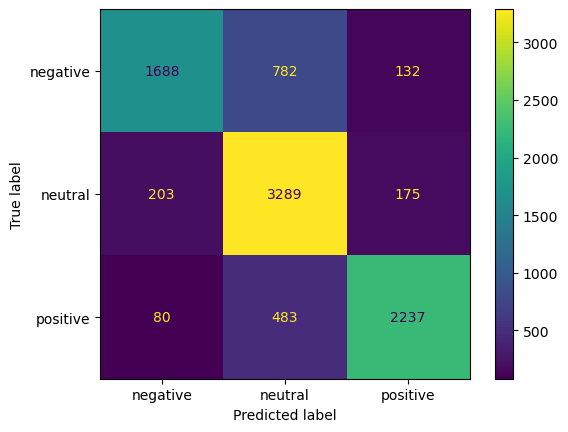

In [52]:
report(voting_classifier)

In [53]:
from sklearn.metrics import f1_score
y_pred = linear_svc.predict(X_test_tfidf)
f1_linear = f1_score(y_test, y_pred, average='weighted')
y_pred = rbf_svc.predict(X_test_tfidf)
f1_rbf = f1_score(y_test, y_pred, average='weighted')
y_pred = nb.predict(X_test_tfidf)
f1_nb = f1_score(y_test, y_pred, average='weighted')
y_pred = log_model.predict(X_test_tfidf)
f1_log = f1_score(y_test, y_pred, average='weighted')
y_pred = gbc.predict(X_test_tfidf)
f1_gbc = f1_score(y_test, y_pred, average='weighted')
y_pred = voting_classifier.predict(X_test_tfidf)
f1_vt = f1_score(y_test, y_pred, average='weighted')
y_pred = rf_classifier.predict(X_test_tfidf)
f1_rf = f1_score(y_test, y_pred, average='weighted')

In [54]:
models_set = [f1_gbc,f1_linear,f1_nb,f1_log,f1_rbf,f1_vt,f1_rf]

In [55]:
names_set = ["f1_gbc","f1_linear","f1_nb","f1_log","f1_rbf","f1_vt","f1_rf"]

In [56]:
df_values = pd.DataFrame({'Values': models_set,"Models": names_set})

In [57]:
df_values.to_csv("f1_results.csv", index=True)

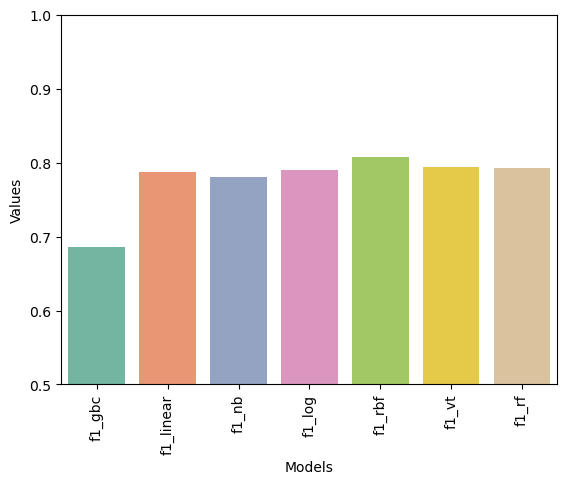

In [58]:
sns.barplot(data=df_values, x="Models", y='Values',palette="Set2")
plt.xticks(rotation=90)
plt.ylim(0.5,1)

plt.show()

In [59]:
from sklearn.model_selection import cross_val_score
models = [log_model,gbc,rf_classifier,nb,voting_classifier,rbf_svc,linear_svc]
mean_scores = []
for model in models:
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5) 
    mean_score = scores.mean()
    mean_scores.append(mean_score)

best_model_index = mean_scores.index(max(mean_scores))
best_model = models[best_model_index]
print(best_model)

SVC()


In [88]:
new_data_tfidf = tfidf.transform(df['processedtext'])
predictions = rbf_svc.predict(new_data_tfidf)
df['support vector classification'] = predictions


In [89]:
df.head(25)

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country,processedtext,support vector classification,Category,support vector classification_r,Year
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,2018-05-25 18:47:16,0,0,2,0,0,en,AU,innovato group data analyst augment machin lea...,neutral,AR,0.5,2018
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,2018-05-25 20:25:12,0,0,0,0,0,en,AU,wait bitcoin ride btc crypto cryptocurr btc et...,neutral,Blockchain and Cryptocurrency,0.5,2018
2,1000141281241149952,Talking all things UAV and where the future is...,2018-05-25 20:27:17,6,0,8,0,0,en,AU,talk thing uav futur head dynam industri women...,neutral,AR,0.5,2018
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",2018-05-25 21:11:24,0,0,2,0,0,en,AU,disrupt camera manufactur make vr headset tini...,neutral,VR,0.5,2018
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,2018-05-25 21:34:07,2,0,12,0,0,en,AU,excit day two amanatcon polici debat includ ec...,neutral,AR,0.5,2018
5,1000158411382700032,outstanding use of AR @Rog42 killer app https:...,2018-05-25 21:35:21,0,0,0,0,0,en,AU,outstand use ar rog42 killer app,neutral,AR,0.5,2018
6,1000168081971289984,We need a price on Carbon Pollution #auspol #q...,2018-05-25 22:13:47,6,0,5,0,0,en,AU,need price carbon pollut auspol qldpol stopada...,neutral,Renewable and Clean Energy,0.5,2018
7,1000170662533590016,Drawing inspiration from traditional theatre f...,2018-05-25 22:24:02,1,0,3,0,0,en,AU,draw inspir tradit theatr virtual realiti game...,neutral,VR,0.5,2018
8,1000182167807309952,If you think a nanny state is oppressive wait ...,2018-05-25 23:09:45,0,0,4,1,0,en,AU,think nanni state oppress wait capit turn heal...,neutral,AR,0.5,2018
9,1000212728252780032,#tic2018 presentations kicks off at #telstrala...,2018-05-26 01:11:12,0,0,3,0,0,en,AU,tic2018 present kick telstralab team present a...,neutral,IOT,0.5,2018


In [91]:
df['ttext'][18]

'Integration, security and usability all holding back great adoption@of IoT solutions #IoT https://t.co/8lR4C2QEEV'

In [93]:
df.to_csv("main_data.csv", index=True)

In [63]:
df["Category"]="-"

In [64]:
df.head()

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country,processedtext,support vector classification,Category
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,2018-05-25 18:47:16,0,0,2,0,0,en,AU,innovato group data analyst augment machin lea...,neutral,-
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,2018-05-25 20:25:12,0,0,0,0,0,en,AU,wait bitcoin ride btc crypto cryptocurr btc et...,neutral,-
2,1000141281241149952,Talking all things UAV and where the future is...,2018-05-25 20:27:17,6,0,8,0,0,en,AU,talk thing uav futur head dynam industri women...,neutral,-
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",2018-05-25 21:11:24,0,0,2,0,0,en,AU,disrupt camera manufactur make vr headset tini...,neutral,-
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,2018-05-25 21:34:07,2,0,12,0,0,en,AU,excit day two amanatcon polici debat includ ec...,neutral,-


In [65]:
df['ttext'].fillna('', inplace=True)

In [66]:
df.loc[df['ttext'].str.contains('Artificial Intelligence|AI|Machine Learning',case=False), 'Category'] = 'AI Related'
df.loc[df['ttext'].str.contains('Internet of Things|IOT',case=False), 'Category'] = 'IOT'
df.loc[df['ttext'].str.contains('3D Printing|Additive Manufacturing',case=False), 'Category'] = 'Additive Manufacturing'
df.loc[df['ttext'].str.contains('Augmented Reality|AR',case=False), 'Category'] = 'AR'
df.loc[df['ttext'].str.contains('Virtual Reality|VR',case=False), 'Category'] = 'VR'
df.loc[df['ttext'].str.contains('Blockchain Technology|Cryptocurrency',case=False), 'Category'] = 'Blockchain and Cryptocurrency'
df.loc[df['ttext'].str.contains('Big Data|Data Analytics',case=False), 'Category'] = 'Data Related'
df.loc[df['ttext'].str.contains('Biotechnology|Bioengineering',case=False), 'Category'] = 'Bio Technology'
df.loc[df['ttext'].str.contains('Renewable Energy Technologies|Clean Energy',case=False), 'Category'] = 'Renewable and Clean Energy'
df.loc[df['ttext'].str.contains('Advanced Manufacturing|Industry 4.0',case=False), 'Category'] = 'Industry 4.0'


In [67]:
nan_count = df['ttext'].isna().sum()

In [68]:
nan_count

0

In [69]:
df.head()

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country,processedtext,support vector classification,Category
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,2018-05-25 18:47:16,0,0,2,0,0,en,AU,innovato group data analyst augment machin lea...,neutral,AR
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,2018-05-25 20:25:12,0,0,0,0,0,en,AU,wait bitcoin ride btc crypto cryptocurr btc et...,neutral,Blockchain and Cryptocurrency
2,1000141281241149952,Talking all things UAV and where the future is...,2018-05-25 20:27:17,6,0,8,0,0,en,AU,talk thing uav futur head dynam industri women...,neutral,AR
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",2018-05-25 21:11:24,0,0,2,0,0,en,AU,disrupt camera manufactur make vr headset tini...,neutral,VR
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,2018-05-25 21:34:07,2,0,12,0,0,en,AU,excit day two amanatcon polici debat includ ec...,neutral,AR


In [70]:
value_counts = df['Category'].value_counts()

In [71]:
value_counts

AR                               23649
VR                               10224
AI Related                        8006
Blockchain and Cryptocurrency     3745
-                                 2496
IOT                               2422
Data Related                      2204
Renewable and Clean Energy        2044
Additive Manufacturing             788
Industry 4.0                       371
Bio Technology                     296
Name: Category, dtype: int64

In [72]:

df['support vector classification_r'] = df['support vector classification'].copy()
df['support vector classification']= df['support vector classification_r'].replace({"neutral": 0.5, "positive": 1, "negative": 0}, inplace=True)
df['support vector classification'] = predictions


In [73]:
df.head(44)

,tid,ttext,tcreatedat,tretweet,treply,tlike,tquote,timpression,tlang,Country,processedtext,support vector classification,Category,support vector classification_r
0,1000116108018360064,Innovato Group's Data Analysts augment your ma...,2018-05-25 18:47:16,0,0,2,0,0,en,AU,innovato group data analyst augment machin lea...,None,AR,0.5
1,1000140757049600000,Me waiting for bitcoin to ride. #btc #crypto #...,2018-05-25 20:25:12,0,0,0,0,0,en,AU,wait bitcoin ride btc crypto cryptocurr btc et...,None,Blockchain and Cryptocurrency,0.5
2,1000141281241149952,Talking all things UAV and where the future is...,2018-05-25 20:27:17,6,0,8,0,0,en,AU,talk thing uav futur head dynam industri women...,None,AR,0.5
3,1000152383656080000,"Is it just me, or should all the disrupted cam...",2018-05-25 21:11:24,0,0,2,0,0,en,AU,disrupt camera manufactur make vr headset tini...,None,VR,0.5
4,1000158098277910016,Excited for day two of #AMAnatcon! Policies up...,2018-05-25 21:34:07,2,0,12,0,0,en,AU,excit day two amanatcon polici debat includ ec...,None,AR,0.5
5,1000158411382700032,outstanding use of AR @Rog42 killer app https:...,2018-05-25 21:35:21,0,0,0,0,0,en,AU,outstand use ar rog42 killer app,None,AR,0.5
6,1000168081971289984,We need a price on Carbon Pollution #auspol #q...,2018-05-25 22:13:47,6,0,5,0,0,en,AU,need price carbon pollut auspol qldpol stopada...,None,Renewable and Clean Energy,0.5
7,1000170662533590016,Drawing inspiration from traditional theatre f...,2018-05-25 22:24:02,1,0,3,0,0,en,AU,draw inspir tradit theatr virtual realiti game...,None,VR,0.5
8,1000182167807309952,If you think a nanny state is oppressive wait ...,2018-05-25 23:09:45,0,0,4,1,0,en,AU,think nanni state oppress wait capit turn heal...,None,AR,0.5
9,1000212728252780032,#tic2018 presentations kicks off at #telstrala...,2018-05-26 01:11:12,0,0,3,0,0,en,AU,tic2018 present kick telstralab team present a...,None,IOT,0.5


In [74]:
average_values = df.groupby(['Category','Country']).agg({'support vector classification': np.mean, }).reset_index()

In [75]:
average_values

,Category,Country,support vector classification
0,-,AU,NaN
1,-,NZ,NaN
2,AI Related,AU,NaN
3,AI Related,NZ,NaN
4,AR,AU,NaN
5,AR,NZ,NaN
6,Additive Manufacturing,AU,NaN
7,Additive Manufacturing,NZ,NaN
8,Bio Technology,AU,NaN
9,Bio Technology,NZ,NaN


In [76]:
df['Year'] = pd.to_datetime(df['tcreatedat']).dt.year

In [94]:
category_predictions = df.groupby(['Year', 'Category'])['support vector classification_r'].mean().reset_index()

# Ülkelere göre ortalama tahmin skorları
country_predictions = df.groupby(['Year', 'Country'])['support vector classification_r'].mean().reset_index()

In [95]:
category_predictions

,Year,Category,support vector classification_r
0,2013,AI Related,0.333333
1,2013,AR,0.500000
2,2014,-,0.515901
3,2014,AI Related,0.492114
4,2014,AR,0.506571
...,...,...,...
107,2023,Data Related,0.500000
108,2023,IOT,0.500000
109,2023,Industry 4.0,0.500000
110,2023,Renewable and Clean Energy,0.516393


In [97]:
country_predictions = df.groupby(['Year', 'Country'])['support vector classification_r'].mean().reset_index()

In [98]:
country_predictions

,Year,Country,support vector classification_r
0,2013,AU,0.500000
1,2013,NZ,0.250000
2,2014,AU,0.502936
3,2014,NZ,0.498812
4,2015,AU,0.509341
5,2015,NZ,0.512072
6,2016,AU,0.511450
7,2016,NZ,0.510702
8,2017,AU,0.510788
9,2017,NZ,0.510483


In [99]:
category_counts = df.groupby(['Year', 'Category'])['processedtext'].count().reset_index()

# Yıllara ve ülkelere göre processedtext sayıları
country_counts = df.groupby(['Year', 'Country'])['processedtext'].count().reset_index()

# Yıllara göre değişimleri birleştirme
category_data = pd.merge(category_predictions, category_counts, on=['Year', 'Category'])
country_data = pd.merge(country_predictions, country_counts, on=['Year', 'Country'])

In [100]:
category_data

,Year,Category,support vector classification_r,processedtext
0,2013,AI Related,0.333333,3
1,2013,AR,0.500000,2
2,2014,-,0.515901,283
3,2014,AI Related,0.492114,317
4,2014,AR,0.506571,837
...,...,...,...,...
107,2023,Data Related,0.500000,10
108,2023,IOT,0.500000,3
109,2023,Industry 4.0,0.500000,2
110,2023,Renewable and Clean Energy,0.516393,61


In [101]:
country_data

,Year,Country,support vector classification_r,processedtext
0,2013,AU,0.500000,3
1,2013,NZ,0.250000,2
2,2014,AU,0.502936,1873
3,2014,NZ,0.498812,421
4,2015,AU,0.509341,3961
5,2015,NZ,0.512072,497
6,2016,AU,0.511450,8253
7,2016,NZ,0.510702,1168
8,2017,AU,0.510788,9872
9,2017,NZ,0.510483,1574


In [102]:
category_data.to_csv('category_data.csv', index=False)
country_data.to_csv('country_data.csv', index=False)


In [113]:
category_sentiment_counts = pd.crosstab([df['Year'], df['Category'],df["Country"]], df['support vector classification'])

In [114]:
category_sentiment_counts.reset_index(inplace=True)

In [115]:
category_sentiment_counts

support vector classification,Year,Category,Country,negative,neutral,positive
0,2013,AI Related,AU,0,2,0
1,2013,AI Related,NZ,1,0,0
2,2013,AR,AU,0,1,0
3,2013,AR,NZ,0,1,0
4,2014,-,AU,3,247,9
...,...,...,...,...,...,...
208,2023,Industry 4.0,AU,0,2,0
209,2023,Renewable and Clean Energy,AU,0,58,2
210,2023,Renewable and Clean Energy,NZ,0,1,0
211,2023,VR,AU,0,101,6


In [106]:
category_sentiment_counts2 =  category_sentiment_counts.copy()

In [107]:
category_sentiment_counts2.head()

support vector classification,Year,Category,negative,neutral,positive
0,2013,AI Related,1,2,0
1,2013,AR,0,2,0
2,2014,-,3,268,12
3,2014,AI Related,13,296,8
4,2014,AR,24,778,35


In [116]:
category_sentiment_counts.to_csv("counts.csv", index=True)